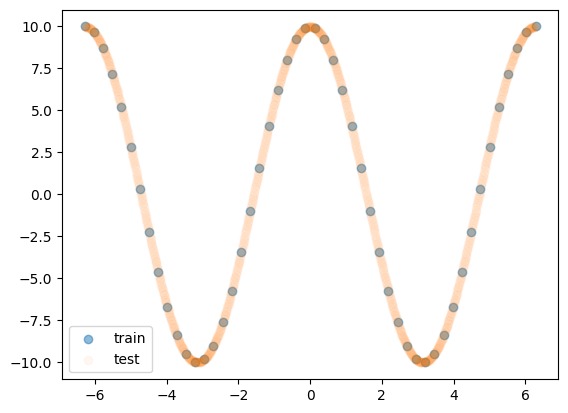

In [16]:
### Load data
import json_tricks as json
import numpy as np
import matplotlib.pyplot as plt
import torch
from KDAREK.utils import Dataset
seed = 12
cos_dataset = Dataset(fx = lambda x: 10 * np.cos(x), n = 50, fix = True, seed = seed)
# cos_dataset = Dataset(fx = lambda x: np.exp(-x/2) * np.sin(2 * np.pi * x),  n = 20, fix = False, a = 0, b = 4.0)
plt.scatter(cos_dataset['train_input'],cos_dataset['train_label'],label = 'train', alpha = 0.5)
plt.scatter(cos_dataset['test_input'],cos_dataset['test_label'],label = 'test', alpha = 0.05)
plt.legend()

In [2]:
from KDAREK import KDAREK
x,y = cos_dataset['test_input'], cos_dataset['test_label']
kdarek = KDAREK([1,5], [5,1], kan_grid=14, kan_k=3, kan_base_fun = 'silu', 
               kan_seed=42, device='cpu')
kdarek.fit(cos_dataset, opt="Adam", lr = 0.1, steps=500, lamb=0.0, seed_knots = 42, rand_method = 'Kmean',
           nonfixknot=True, 
           evaluate=True, logsave = False, scheduler="dec", step_sch=50, gamma=0.9);
yhat, yerr = kdarek.predict(x, L_mlp = 10, L_k = 10, L_1 = 10)

LR: 3.49e-02 | train_loss: 8.57e-01 | test_loss: 7.89e-01 | reg: 2.61e+01 | : 100%|█| 500/500 [00:09


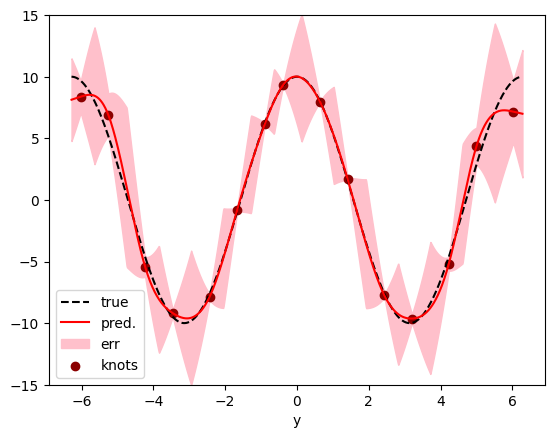

In [12]:
lb,ub = (yhat - yerr), (yhat+yerr)
xg, yg = kdarek.samples['xi'], kdarek(kdarek.samples['xi']).detach()
plt.plot(x,y, '--', color = 'k', label = 'true')
plt.plot(x, yhat, color = 'red', label = 'pred.')
plt.fill_between(x.flatten(), lb.flatten(), ub.flatten(), color = 'pink', label = 'err')
plt.scatter(xg, yg, color = 'darkred', label = 'knots')
plt.ylim([-15,15])
plt.xlabel('x')
plt.xlabel('y')
plt.legend()

In [25]:
from DAREK import DAREK
x,y = cos_dataset['test_input'], cos_dataset['test_label']
darek = DAREK([1,5,1], grid=14, k=3, base_fun = 'silu', seed=42, device='cpu')
darek.fit(cos_dataset, opt="Adam", lr = 0.1, steps=500, lamb=0.0, seed_knots = 42, rand_method = 'Kmean',
            nonfixknot=True,
           evaluate=True, logsave = False, scheduler="dec", step_sch=50, gamma=0.9);
yhatd, yerrd = darek.predict(x, f1= 10, fk = 1000)

checkpoint directory created: ./model
saving model version 0.0


LR: 3.49e-02 | train_loss: 1.43e-01 | test_loss: 3.27e-01 | reg: 1.88e+01 | : 100%|█| 500/500 [00:08


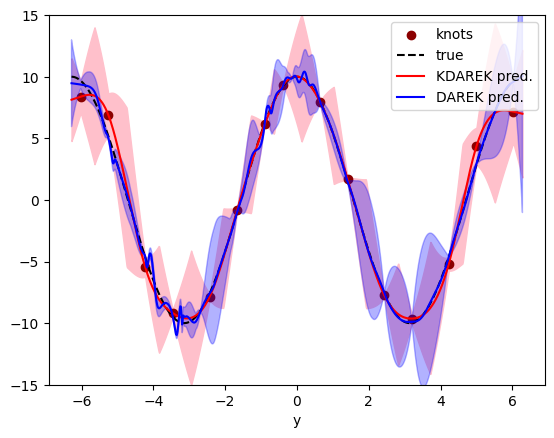

In [26]:
lb,ub = (yhat - yerr), (yhat+yerr)
xg, yg = kdarek.samples['xi'], kdarek(kdarek.samples['xi']).detach()

plt.fill_between(x.flatten(), lb.flatten(), ub.flatten(), color = 'pink')
plt.scatter(xg, yg, color = 'darkred', label = 'knots')
plt.plot(x,y, '--', color = 'k', label = 'true')
plt.plot(x, yhat, color = 'red', label = 'KDAREK pred.')


lbd,ubd = (yhatd - yerrd), (yhatd+yerrd)
plt.plot(x, yhatd, color = 'blue', label = 'DAREK pred.')
plt.fill_between(x.flatten(), lbd.flatten(), ubd.flatten(), color = 'blue', alpha = 0.3)

plt.ylim([-15,15])
plt.xlabel('x')
plt.xlabel('y')
plt.legend(loc='upper right')